## Identifying Artist from Art

The goal of this work is build a neural network capable to analyze some painting and classify their respective artists.

For that we are using the dataset [**Best Artworks of All Time**](https://www.kaggle.com/ikarus777/best-artworks-of-all-time).

**Read Data**

In [11]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers

In [2]:
# Creating the datasets.

artists_df = pd.read_csv('archive/artists.csv')

train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory='archive/images/images',
                                                               validation_split=0.2,
                                                               subset='training',
                                                               seed=1)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(directory='archive/images/images',
                                                                    validation_split=0.2,
                                                                    subset='validation',
                                                                    seed=1)

Found 8774 files belonging to 51 classes.
Using 7020 files for training.
Found 8774 files belonging to 51 classes.
Using 1754 files for validation.


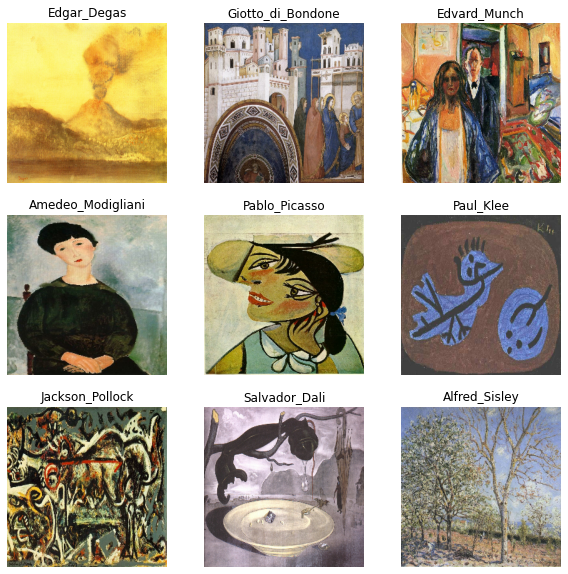

In [3]:
# Visualize the data: here are the first 9 images from the training dataset.

plt.figure(figsize=(10, 10))

class_names = train_ds.class_names

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

**Build Model**

In [5]:
# Configure the dataset for performance.
#
# https://www.tensorflow.org/tutorials/load_data/images#configure_the_dataset_for_performance

train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
model = models.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255))

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names)))

In [32]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
220/220 [==============================] - 266s 1s/step - loss: 4.1586 - accuracy: 0.0827 - val_loss: 3.6125 - val_accuracy: 0.1038
Epoch 2/10
220/220 [==============================] - 262s 1s/step - loss: 3.5624 - accuracy: 0.1119 - val_loss: 3.4179 - val_accuracy: 0.1471
Epoch 3/10
220/220 [==============================] - 262s 1s/step - loss: 3.2943 - accuracy: 0.1635 - val_loss: 3.2372 - val_accuracy: 0.1899
Epoch 4/10
220/220 [==============================] - 267s 1s/step - loss: 2.9007 - accuracy: 0.2312 - val_loss: 3.3895 - val_accuracy: 0.2127
Epoch 5/10
220/220 [==============================] - 289s 1s/step - loss: 2.3942 - accuracy: 0.3400 - val_loss: 3.8344 - val_accuracy: 0.2087
Epoch 6/10
220/220 [==============================] - 275s 1s/step - loss: 1.8531 - accuracy: 0.4674 - val_loss: 5.0867 - val_accuracy: 0.1956
Epoch 7/10
220/220 [==============================] - 289s 1s/step - loss: 1.5116 - accuracy: 0.5625 - val_loss: 5.9150 - val_accuracy: 0.1973

In [33]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 230400)           

55/55 - 14s - loss: 7.9598 - accuracy: 0.1745
Accuracy: 0.17445838451385498


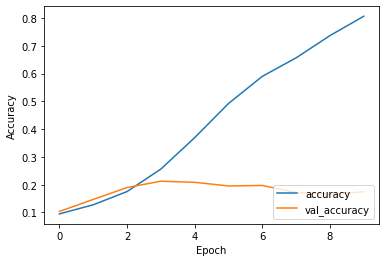

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

print('Accuracy:', test_acc)